

#  Interacting with the Pittsburgh Dataset with the ArcGIS API in Jupyter Notebooks

Early in 2017, ESRI released a new set of tools to help automate tasks and content management with Python and Jupyter Notebooks.  While these tools do not have all the functionality and power of the standalone software.  These new tools are targeting the future of online hosted services and the ability to handle very large datasets.  

The Python API has Python modules, classes, functions, and types for managing and working with elements of the ArcGIS platform information model. The GIS model is our main interface. It also provides a MapView Jupyter notebook widget for visualizing maps and layers.  It also has types and functions that allow manipulation of the GIS objects.  Note:  This is a very young product and you may encounter bugs and limited functionality.

The following is a brief demonstration of working with our newly processed Pittsburgh dataset. Our setup scripts have installed the anaconda package and required files to run Jupyter notebooks on the AWS instance.  We have accessed this notebook, which is also hosted on the AWS server through the browser interface.

First we log on to our ArcGIS online account.  Alternatively, we could log on to an enterprise server if available.  For the purposes of this project, we used a time-limited free developer trial account.

In [1]:
import os
import getpass

import arcgis
from arcgis.gis import GIS
from arcgis.features import FeatureLayerCollection


password = getpass.getpass("Enter password: ")
gis = GIS("https://www.arcgis.com","miwamotoDEV", password)
#gis = GIS("https://www.arcgis.com","miwamoto", password)
print("Successfully logged in as: " + gis.properties.user.username)

Enter password: ········
Successfully logged in as: miwamotoDEV


We are interested in Pittsburgh and crime.  So, first we set up our map of Pittsburgh.  This map is a base map from ArcGIS online.


In [2]:
map1 = gis.map("Pittsburgh, PA", zoomlevel = 13)
map1

Now we search for the arrest data which was previously loaded.

In [11]:
search_results = gis.content.search('title: Pittsburgh Arrest Data',
                                    'Feature Layer')


In [12]:
search_results

[<Item title:"Pittsburgh Arrest Data" type:Feature Service owner:miwamotoDEV>,
 <Item title:"Pittsburgh Crime Forecast2" type:Feature Service owner:miwamotoDEV>]

<Item title:"Pittsburgh Arrest Data" type:Feature Service owner:miwamotoDEV>
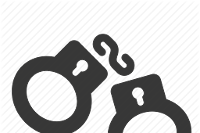

<Item title:"Pittsburgh Crime Forecast2" type:Feature Service owner:miwamotoDEV>
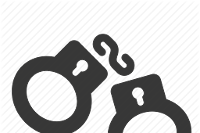

In [13]:
from IPython.display import display


for item in search_results:
    display(item)

The search return 2 objects.  In this case, we limited the search to data for which we were listed as the 'owner'.  We could broaden the search to outside our organization


In [15]:
arrest_item = search_results[0]
map1.add_layer(arrest_item)

Notice on the map above, that the arrests now appear on the map.  However this is not merely location information.  This data was extracted from the rich dataset we imported from data.gov.  We can examine this data through this Jupyter notebook interface. For example, we can load this arrest data in a panda dataframe.


In [20]:
#arrest_item.layers
arr_fset = arrest_item.layers[0].query()
arr_fset.df

,AGE,ARRESTLOCATION,ARRESTTIME,CCR,COUNCIL_DISTRICT,F_id,GENDER,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTTRACT,INCIDENTZONE,OFFENSES,PK,PUBLIC_WORKS_DIVISION,RACE,X,Y,geometry.x,geometry.y
FID,,,,,,,,,,,,,,,,,,,
1,30.0,"1200 Block Westerson AV Pittsburgh, PA 15233",1476369900000,16193536,2.0,1947,M,"600 Block Hillsboro ST Pittsburgh, PA 15204",Sheraden,2018.0,6,3701 Robbery.,1976929,5.0,B,-80.052789,40.453828,-8.911436e+06,4.932112e+06
2,35.0,"400 Block Mt Pleasant RD Pittsburgh, PA 15214",1477820100000,16204720,1.0,2448,M,"400 Block Mt Pleasant RD Pittsburgh, PA 15214",Northview Heights,2609.0,1,2701 Simple Assault.,1977592,1.0,B,-80.001901,40.479829,-8.905771e+06,4.935917e+06
3,54.0,"1300 Block Colescott ST Pittsburgh, PA 15205",1476546300000,16195045,2.0,2094,M,"1300 Block Colescott ST Pittsburgh, PA 15205",Westwood,2811.0,6,2701 Simple Assault.,1977126,5.0,W,-80.048787,40.434924,-8.910990e+06,4.929347e+06
4,36.0,"Boyd ST & Diamond ST Pittsburgh, PA 15219",1460082840000,16062908,6.0,4666,M,"Boyd ST & Diamond ST Pittsburgh, PA 15219",Bluff,103.0,2,13(a)(32) Paraphernalia - Use or Possession,1980438,6.0,W,-79.993293,40.438656,-8.904813e+06,4.929893e+06
5,26.0,"700 Block Cedar AV Pittsburgh, PA 15212",1484760000000,17010951,1.0,4782,F,"700 Block Cedar AV Pittsburgh, PA 15212",East Allegheny,2304.0,1,5902(a)(2) Prostitution - Loitering for purpos...,1980600,1.0,W,-80.001517,40.452989,-8.905728e+06,4.931989e+06
6,37.0,"1700 Block Essen ST & Penfort ST Pittsburgh, P...",1477244940000,16142078,6.0,1752,M,"1700 Block Letsche ST Pittsburgh, PA 15214",Fineview,2509.0,1,3502 Burglary.,1976692,1.0,B,-80.008239,40.462628,-8.906476e+06,4.933400e+06
7,26.0,"1700 Block Broadway AV Pittsburgh, PA 15216",1484426100000,17008615,4.0,4849,F,"1700 Block Broadway AV Pittsburgh, PA 15216",Beechview,1916.0,6,13(a)(16) Possession of Controlled Substance /...,1980670,5.0,W,-80.025281,40.408471,-8.908374e+06,4.925479e+06
8,36.0,"1300 Block Preston ST Pittsburgh, PA 15205",1476922560000,16197940,2.0,2112,F,"1300 Block Preston ST Pittsburgh, PA 15205",Westwood,2811.0,6,2701 Simple Assault.,1977144,5.0,W,-80.052515,40.435581,-8.911405e+06,4.929443e+06
9,57.0,"West End BRDG & Western AV Pittsburgh, PA 15233",1491098820000,17058882,NaN,7143,M,"West End BRDG & Western AV Pittsburgh, PA 15233",Manchester,2107.0,1,1301 Registration and Certificate of Title Req...,1983499,NaN,W,0.000000,0.000000,0.000000e+00,0.000000e+00
